In [102]:
import numpy as np
import pandas as pd
from clusterlogs import pipeline
import nltk

In [103]:
pd.set_option('display.max_colwidth', -1)

In [104]:
df = pd.read_csv('error0225.txt')

In [105]:
df.head(10)

,src_site,dst_site,error
0,ifae,UKI-SCOTGRID-GLASGOW,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed : stat64 error: No space left on device
1,NaN,NaN,Result (Neon): Could not read status line: connection was closed by server after 1 attempts
2,IN2P3-LPSC,UKI-SCOTGRID-GLASGOW,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed : stat64 error: No space left on device
3,IN2P3-LAPP,MPPMU,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Transfer failed: failure: Remote copy failed with status code 403:"
4,TRIUMF-LCG2,UKI-SCOTGRID-GLASGOW,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed : stat64 error: No space left on device
5,ifae,MPPMU,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Transfer failed: failure: rejected PUT: 403 Forbidden"
6,UKI-SCOTGRID-ECDF,MPPMU,"TRANSFER ERROR: Copy failed with mode 3rd pull, with error: Request cancellation was requested."
7,CERN-PROD,pic,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: copy HTTP 409 : Conflict, File Exist"
8,IN2P3-CC,UKI-SCOTGRID-GLASGOW,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed : stat64 error: No space left on device
9,AGLT2,INFN-T1,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred"


Most failing source sites according to the results from Panos algorithm (also this involves errors with empty messages, so the number of messages that can be used for ML is smaller)

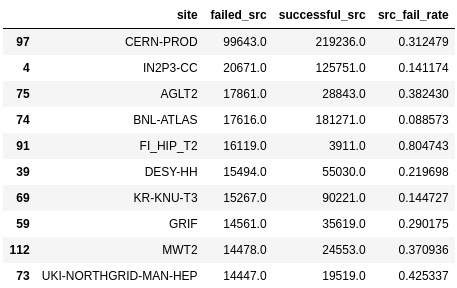

In [106]:
from IPython.display import Image
Image(filename='src_fail.png')

Chose with a few with the biggest fail rate

In [107]:
df_cern = df[df['src_site']=='CERN-PROD']
df_aglt = df[df['src_site']=='AGLT2']
df_fihipt = df[df['src_site']=='FI_HIP_T2']

In [108]:
cluster_cern = pipeline.Chain(df_cern, target='error', model_name='word2vec_cern.model', mode='create')
cluster_aglt = pipeline.Chain(df_aglt, target='error', model_name='word2vec_aglt.model', mode='create')
cluster_fihipt = pipeline.Chain(df_fihipt, target='error', model_name='word2vec_fihipt.model', mode='create')

In [109]:
cluster_cern.process()
cluster_aglt.process()
cluster_fihipt.process()

/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['sequence'] = self.tokens.tokenized_cluster
/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['tokenized_pattern'] = self.tokens.tokenized_pattern


Initial size of vocabulary: 4445
Size of vocabulary after removing tokens that appears only once: 3466
Size of vocabulary after removing rare tokens: 417
Tokenization finished


/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['cleaned'] = self.tokens.detokenize(cleaned_tokens)


Found 208 equal groups
Matching Clusterization...
Finished with 114 clusters


/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['sequence'] = self.tokens.tokenized_cluster
/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['tokenized_pattern'] = self.tokens.tokenized_pattern


Initial size of vocabulary: 803
Size of vocabulary after removing tokens that appears only once: 530
Size of vocabulary after removing rare tokens: 304
Tokenization finished


/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['cleaned'] = self.tokens.detokenize(cleaned_tokens)


Found 98 equal groups
Matching Clusterization...
Finished with 65 clusters


/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['sequence'] = self.tokens.tokenized_cluster
/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['tokenized_pattern'] = self.tokens.tokenized_pattern


Initial size of vocabulary: 306
Size of vocabulary after removing tokens that appears only once: 227
Size of vocabulary after removing rare tokens: 157
Tokenization finished


/home/ntuckus/test/error-log-clustering/jupyter/clusterlogs/pipeline.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['cleaned'] = self.tokens.detokenize(cleaned_tokens)


Found 66 equal groups
Matching Clusterization...
Finished with 23 clusters


Separating clusters containing fewer than 3 messages

In [110]:
clusters_cern, outliers_cern = cluster_cern.split_clusters(cluster_cern.result, 'cluster_size', threshold=3)
clusters_aglt, outliers_aglt = cluster_aglt.split_clusters(cluster_aglt.result, 'cluster_size', threshold=3)
clusters_fihipt, outliers_fihipt = cluster_fihipt.split_clusters(cluster_fihipt.result, 'cluster_size', threshold=3)


Top 10 clusters by the size of cluster in each group

In [111]:
#CERN-PROD
top_numb = 10
top_clusters_cern = cluster_cern.validation(clusters_cern)[['cluster_size','pattern','mean_similarity']].sort_values(by=["cluster_size"], ascending=False) #clusters sorted by similarity inside the cluster
top_clusters_cern.head(top_numb)

,cluster_size,pattern,mean_similarity
0,31929,Error reported from srm_ifce : 2 [SE][Ls][SRM_INVALID_PATH] No such file or directory.,1.00
1,23432,globus_ftp_client: the server responded with an error 550 550-GlobusError: v=1 c=PATH_NOT_FOUND 550-GridFTP-Errno: 2 550-GridFTP-Reason: System error in stat 550-GridFTP-Error-String: No such file or directory 550 End.,1.00
2,10772,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed : stat64 error: No space left on device,1.00
3,9772,SOURCE CHECKSUM MISMATCH User defined checksum and source checksum do not match｟*｠ !=｟*｠,0.86
4,6557,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: copy HTTP 409 : Conflict, File Exist",1.00
5,2752,"｟*｠ srm-ifce err: Communication error on send, err: [SE][｟*｠][] httpg:/｟*｠:｟*｠/srm/managerv2: CGSI-gSOAP running on｟*｠ reports Error reading token data｟*｠: Connection｟*｠",0.86
6,1828,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",1.00
7,1079,Destination file exists and overwrite is not enabled,1.00
8,958,Operation timed out,1.00
9,696,"DESTINATION MAKE_PARENT srm-ifce err: Permission denied, err: [SE][Mkdir][SRM_AUTHORIZATION_FAILURE] httpg:/recas-se-01.cs.infn.it:8446/srm/managerv2: srm:/recas-se-01.cs.infn.it/dpm/cs.infn.it/home/atlas/atlasdatadisk/rucio/user/｟*｠/｟*｠/｟*｠: Permission denied",0.96


In [112]:
#AGLT2
top_clusters_aglt = cluster_aglt.validation(clusters_aglt)[['cluster_size','pattern','mean_similarity']].sort_values(by=["cluster_size"], ascending=False) #clusters sorted by similarity inside the cluster
top_clusters_aglt.head(top_numb)

,cluster_size,pattern,mean_similarity
0,7176,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed : stat64 error: No space left on device,1.00
1,3541,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",1.00
2,3321,"DESTINATION｟*｠ srm-ifce err: Communication error on send, err: [SE][｟*｠][] httpg:/｟*｠:｟*｠/srm/managerv2: CGSI-gSOAP running on｟*｠ reports Error reading token data header: Connection｟*｠",0.93
3,910,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Transfer failed: failure: rejected PUT:｟*｠",0.94
4,335,DESTINATION OVERWRITE Result (Neon): SSL handshake failed: sslv3 alert certificate unknown after 1 attempts,1.00
5,308,TRANSFER Operation timed out,1.00
6,249,"DESTINATION MAKE_PARENT srm-ifce err: Permission denied, err: [SE][Mkdir][SRM_AUTHORIZATION_FAILURE] httpg:/recas-se-01.cs.infn.it:8446/srm/managerv2: srm:/recas-se-01.cs.infn.it/dpm/cs.infn.it/home/atlas/atlasdatadisk/rucio/user/｟*｠/｟*｠/｟*｠: Permission denied",0.97
7,244,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Transfer failed: failure: problem sending data: Certificate for <｟*｠> doesnt match any of the subject alternative names: [｟*｠@｟*｠]",0.84
8,116,TRANSFER globus_ftp_client: the server responded with an error 451 Transfer was forcefully killed,1.00
9,93,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg:/grid-cert-03.roma1.infn.it:8446/srm/managerv2: CGSI-gSOAP running on｟*｠ reports could not open connection to grid-cert-03.roma1.infn.it:8446",0.84


In [113]:
#FI_HIP_T2
top_clusters_fihipt = cluster_fihipt.validation(clusters_fihipt)[['cluster_size','pattern','mean_similarity']].sort_values(by=["cluster_size"], ascending=False) #clusters sorted by similarity inside the cluster
top_clusters_fihipt.head(top_numb)

,cluster_size,pattern,mean_similarity
0,15620,"srm-ifce err: Communication error on send, err: [SE][Ls][] httpg:/madhatter.csc.fi:8443/srm/managerv2: CGSI-gSOAP running on｟*｠ reports Error reading token data header: Connection closed",0.99
1,130,"TRANSFER globus_ftp_client: the server responded with an error 451 451-GlobusError: v=1 c=INTERNAL_ERROR 451-GridFTP-Errno: 255 451-GridFTP-Reason: System error in write into HDFS (host=｟*｠, user=cmsprod, path=/cms/store/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠) 451-GridFTP-Error-String: Unknown error 255 451｟*｠",0.78
2,117,Destination file exists and overwrite is not enabled,1.00
3,36,"｟*｠ globus_ftp_client: the server responded with an error 530 Login incorrect. : Server over the global connection limit of 250 (user has 0 transfers) (host=｟*｠, user=cmsprod, path=(null)",0.92
4,35,DESTINATION SRM_PUT_TURL error on the turl request : [SE][StatusOfPutRequest][SRM_NO_FREE_SPACE] <none>,1.00
5,13,globus_ftp_client: the operation was aborted,1.00
6,11,"｟*｠ globus_ftp_client: the server responded with an error 530 Login incorrect. : Server is cancelling transfer due to over-load limit (host=se11.vampire, user=cmsphedex, path=(null)",0.94
7,9,TRANSFER globus_ftp_client: the server responded with an error 500 Command failed. : Internal server error,1.00
8,7,TRANSFER Operation timed out,1.00
9,7,"TRANSFER Transfer canceled because the gsiftp performance marker timeout of 360 seconds has been exceeded, or all performance markers during that period indicated zero bytes transferred",1.00


Most inaccurate clusters

In [114]:
#CERN-PROD
top_clusters_cern[['cluster_size','pattern','mean_similarity']].sort_values(by=["mean_similarity"]).head(5)

,cluster_size,pattern,mean_similarity
15,353,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg:/｟*｠:｟*｠/srm/managerv2: CGSI-gSOAP running on｟*｠ reports could not open connection to｟*｠:｟*｠",0.81
39,26,DESTINATION SRM_PUTDONE call to srm_ifce error: [SE][PutDone][] httpg:/｟*｠:｟*｠/srm/managerv2: CGSI-gSOAP running on｟*｠ reports Error reading token data header: Connection｟*｠,0.82
3,9772,SOURCE CHECKSUM MISMATCH User defined checksum and source checksum do not match｟*｠ !=｟*｠,0.86
5,2752,"｟*｠ srm-ifce err: Communication error on send, err: [SE][｟*｠][] httpg:/｟*｠:｟*｠/srm/managerv2: CGSI-gSOAP running on｟*｠ reports Error reading token data｟*｠: Connection｟*｠",0.86
16,346,｟*｠ globus_xio: Unable to connect to｟*｠:｟*｠ globus_xio: System error in connect: Connection refused globus_xio: A system call failed: Connection refused,0.88


In [115]:
#AGLT2
top_clusters_aglt[['cluster_size','pattern','mean_similarity']].sort_values(by=["mean_similarity"]).head(5)

,cluster_size,pattern,mean_similarity
28,10,｟*｠ globus_xio: Unable to connect to｟*｠:2811 globus_xio: System error in connect: Connection timed out globus_xio: A system call failed: Connection timed out,0.83
9,93,"DESTINATION OVERWRITE srm-ifce err: Communication error on send, err: [SE][srmRm][] httpg:/grid-cert-03.roma1.infn.it:8446/srm/managerv2: CGSI-gSOAP running on｟*｠ reports could not open connection to grid-cert-03.roma1.infn.it:8446",0.84
7,244,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Transfer failed: failure: problem sending data: Certificate for <｟*｠> doesnt match any of the subject alternative names: [｟*｠@｟*｠]",0.84
2,3321,"DESTINATION｟*｠ srm-ifce err: Communication error on send, err: [SE][｟*｠][] httpg:/｟*｠:｟*｠/srm/managerv2: CGSI-gSOAP running on｟*｠ reports Error reading token data header: Connection｟*｠",0.93
3,910,"TRANSFER ERROR: Copy failed with mode 3rd push, with error: Transfer failed: failure: rejected PUT:｟*｠",0.94


In [116]:
#FI_HIP_T2
top_clusters_fihipt[['cluster_size','pattern','mean_similarity']].sort_values(by=["mean_similarity"]).head(5)

,cluster_size,pattern,mean_similarity
1,130,"TRANSFER globus_ftp_client: the server responded with an error 451 451-GlobusError: v=1 c=INTERNAL_ERROR 451-GridFTP-Errno: 255 451-GridFTP-Reason: System error in write into HDFS (host=｟*｠, user=cmsprod, path=/cms/store/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠/｟*｠) 451-GridFTP-Error-String: Unknown error 255 451｟*｠",0.78
3,36,"｟*｠ globus_ftp_client: the server responded with an error 530 Login incorrect. : Server over the global connection limit of 250 (user has 0 transfers) (host=｟*｠, user=cmsprod, path=(null)",0.92
6,11,"｟*｠ globus_ftp_client: the server responded with an error 530 Login incorrect. : Server is cancelling transfer due to over-load limit (host=se11.vampire, user=cmsphedex, path=(null)",0.94
10,5,｟*｠ globus_xio: Unable to connect to ganymede.hep.kbfi.ee:2811 globus_xio: globus_libc_getaddrinfo failed. globus_common: Name or service not known,0.97
12,3,DESTINATION SRM_PUTDONE Error on the surl srm:/sbgse1.in2p3.fr/dpm/in2p3.fr/home/cms/phedex/store/PhEDEx_LoadTest07/LoadTest07_Debug_FI_HIP/FR_IPHC/130/｟*｠ while putdone : [SE][PutDone][SRM_FAILURE] Incompatible with current file status,0.98
